In [379]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [380]:
df = pd.read_csv('scraped_data.csv')
df.head(5)

,Address,Property Name,Property Type,Bedrooms,Bathrooms,Asking Price,Size,PSF,Age,Tenure,No. of Units,District,Amenities,Link
0,2 Dunman Road (439188),Grand Dunman,Apartment,4+1,3,"$3,764,000","1,679 sqft","$2,242 psf",Not Available,LEASEHOLD/99 years,1008,D15 - East Coast / Marine Parade,"{'Primary Schools': [{'Kong Hwa': '0.41 km'}, ...",https://www.srx.com.sg/listings/101051671/for-...
1,Shelford Road,Shelford View,Condominium,5,4,"$10,000,000","5,134 sqft","$1,948 psf",41,FREEHOLD,20,D11 - Newton / Novena,"{'Primary Schools': [{""Raffles Girls' Primary""...",https://www.srx.com.sg/listings/101439641/for-...
2,Hillview Rise,Hillhaven,Apartment,2,2,"$1,387,352",678 sqft,"$2,046 psf",Not Available,LEASEHOLD/99 years,341,D23 - Dairy Farm / Bukit Panjang / Choa Chu Kang,{'Primary Schools': [{'Chij Our Lady Queen Of ...,https://www.srx.com.sg/listings/101369031/for-...
3,60H Kent Ridge Hill Residences (117321),Kent Ridge Hill Residences,Apartment,1,1,"$1,030,000 (Negotiable)",474 sqft,"$2,173 psf",1,LEASEHOLD/99 years,548,D5 - Buona Vista / West Coast / Clementi New Town,"{'Primary Schools': [], 'Secondary Schools': [...",https://www.srx.com.sg/listings/100989811/for-...
4,Marina Way,Marina One Residences,Apartment,1,1,"$1,630,000",700 sqft,"$2,329 psf",7,LEASEHOLD/99 years,1042,D1 - Boat Quay / Raffles Place / Marina,{'Primary Schools': [{'Cantonment Primary': '1...,https://www.srx.com.sg/listings/95119111/for-s...


# Data Cleaning

In [381]:
#removing the link column 
df = df.drop('Link', axis=1)

In [382]:
#replace all the Not available with NaN
df.replace("Not Available", np.nan, inplace=True)
df.head(5)

,Address,Property Name,Property Type,Bedrooms,Bathrooms,Asking Price,Size,PSF,Age,Tenure,No. of Units,District,Amenities
0,2 Dunman Road (439188),Grand Dunman,Apartment,4+1,3,"$3,764,000","1,679 sqft","$2,242 psf",NaN,LEASEHOLD/99 years,1008,D15 - East Coast / Marine Parade,"{'Primary Schools': [{'Kong Hwa': '0.41 km'}, ..."
1,Shelford Road,Shelford View,Condominium,5,4,"$10,000,000","5,134 sqft","$1,948 psf",41,FREEHOLD,20,D11 - Newton / Novena,"{'Primary Schools': [{""Raffles Girls' Primary""..."
2,Hillview Rise,Hillhaven,Apartment,2,2,"$1,387,352",678 sqft,"$2,046 psf",NaN,LEASEHOLD/99 years,341,D23 - Dairy Farm / Bukit Panjang / Choa Chu Kang,{'Primary Schools': [{'Chij Our Lady Queen Of ...
3,60H Kent Ridge Hill Residences (117321),Kent Ridge Hill Residences,Apartment,1,1,"$1,030,000 (Negotiable)",474 sqft,"$2,173 psf",1,LEASEHOLD/99 years,548,D5 - Buona Vista / West Coast / Clementi New Town,"{'Primary Schools': [], 'Secondary Schools': [..."
4,Marina Way,Marina One Residences,Apartment,1,1,"$1,630,000",700 sqft,"$2,329 psf",7,LEASEHOLD/99 years,1042,D1 - Boat Quay / Raffles Place / Marina,{'Primary Schools': [{'Cantonment Primary': '1...


In [383]:
# Checking nan values
# Check for NaN values in each column
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:")
print(nan_counts_per_column)

NaN counts per column:
Address             94
Property Name       94
Property Type       94
Bedrooms           195
Bathrooms          967
Asking Price       218
Size                96
PSF               2967
Age              11706
Tenure             239
No. of Units       826
District            94
Amenities            0
dtype: int64


In [384]:
# Remove the rows with no addresses
df = df[df['Address'].notna()]
df.head()

,Address,Property Name,Property Type,Bedrooms,Bathrooms,Asking Price,Size,PSF,Age,Tenure,No. of Units,District,Amenities
0,2 Dunman Road (439188),Grand Dunman,Apartment,4+1,3,"$3,764,000","1,679 sqft","$2,242 psf",NaN,LEASEHOLD/99 years,1008,D15 - East Coast / Marine Parade,"{'Primary Schools': [{'Kong Hwa': '0.41 km'}, ..."
1,Shelford Road,Shelford View,Condominium,5,4,"$10,000,000","5,134 sqft","$1,948 psf",41,FREEHOLD,20,D11 - Newton / Novena,"{'Primary Schools': [{""Raffles Girls' Primary""..."
2,Hillview Rise,Hillhaven,Apartment,2,2,"$1,387,352",678 sqft,"$2,046 psf",NaN,LEASEHOLD/99 years,341,D23 - Dairy Farm / Bukit Panjang / Choa Chu Kang,{'Primary Schools': [{'Chij Our Lady Queen Of ...
3,60H Kent Ridge Hill Residences (117321),Kent Ridge Hill Residences,Apartment,1,1,"$1,030,000 (Negotiable)",474 sqft,"$2,173 psf",1,LEASEHOLD/99 years,548,D5 - Buona Vista / West Coast / Clementi New Town,"{'Primary Schools': [], 'Secondary Schools': [..."
4,Marina Way,Marina One Residences,Apartment,1,1,"$1,630,000",700 sqft,"$2,329 psf",7,LEASEHOLD/99 years,1042,D1 - Boat Quay / Raffles Place / Marina,{'Primary Schools': [{'Cantonment Primary': '1...


In [385]:
# Check for the new nan values
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:")
print(nan_counts_per_column)

NaN counts per column:
Address              0
Property Name        0
Property Type        0
Bedrooms           101
Bathrooms          873
Asking Price       124
Size                 2
PSF               2873
Age              11612
Tenure             145
No. of Units       732
District             0
Amenities            0
dtype: int64


In [386]:
#drop the columns where the size and PSF are NaN as they cant predict the asking price value
rows_with_null_size_psf = df[df['Size'].isnull() & df['PSF'].isnull()]
print(rows_with_null_size_psf)
df = df.drop(rows_with_null_size_psf.index)

              Address    Property Name Property Type Bedrooms Bathrooms  \
6482       Meyer Road    Meyer Mansion     Apartment        4       NaN   
7761  Belgravia Drive  Belgravia Drive   Condominium        5         6   

         Asking Price Size  PSF  Age    Tenure No. of Units  \
6482  (View to Offer)  NaN  NaN  NaN  FREEHOLD          200   
7761  (View to Offer)  NaN  NaN  NaN  FREEHOLD          NaN   

                              District  \
6482  D15 - East Coast / Marine Parade   
7761      D28 - Seletar / Yio Chu Kang   

                                              Amenities  
6482  {'Primary Schools': [{'Tanjong Katong Primary'...  
7761  {'Primary Schools': [{'Rosyth': '1.46 km'}, {'...  


In [387]:
#check for the new nan values
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:")
print(nan_counts_per_column)

NaN counts per column:
Address              0
Property Name        0
Property Type        0
Bedrooms           101
Bathrooms          872
Asking Price       124
Size                 0
PSF               2871
Age              11610
Tenure             145
No. of Units       731
District             0
Amenities            0
dtype: int64


In [388]:
#drop the columns where the Asking Price and PSF are NaN as they cant predict the asking price value
rows_with_null_asking_price_psf = df[df['Asking Price'].isnull() & df['PSF'].isnull()]
print(rows_with_null_size_psf)
df = df.drop(rows_with_null_asking_price_psf.index)
df.head()

              Address    Property Name Property Type Bedrooms Bathrooms  \
6482       Meyer Road    Meyer Mansion     Apartment        4       NaN   
7761  Belgravia Drive  Belgravia Drive   Condominium        5         6   

         Asking Price Size  PSF  Age    Tenure No. of Units  \
6482  (View to Offer)  NaN  NaN  NaN  FREEHOLD          200   
7761  (View to Offer)  NaN  NaN  NaN  FREEHOLD          NaN   

                              District  \
6482  D15 - East Coast / Marine Parade   
7761      D28 - Seletar / Yio Chu Kang   

                                              Amenities  
6482  {'Primary Schools': [{'Tanjong Katong Primary'...  
7761  {'Primary Schools': [{'Rosyth': '1.46 km'}, {'...  


,Address,Property Name,Property Type,Bedrooms,Bathrooms,Asking Price,Size,PSF,Age,Tenure,No. of Units,District,Amenities
0,2 Dunman Road (439188),Grand Dunman,Apartment,4+1,3,"$3,764,000","1,679 sqft","$2,242 psf",NaN,LEASEHOLD/99 years,1008,D15 - East Coast / Marine Parade,"{'Primary Schools': [{'Kong Hwa': '0.41 km'}, ..."
1,Shelford Road,Shelford View,Condominium,5,4,"$10,000,000","5,134 sqft","$1,948 psf",41,FREEHOLD,20,D11 - Newton / Novena,"{'Primary Schools': [{""Raffles Girls' Primary""..."
2,Hillview Rise,Hillhaven,Apartment,2,2,"$1,387,352",678 sqft,"$2,046 psf",NaN,LEASEHOLD/99 years,341,D23 - Dairy Farm / Bukit Panjang / Choa Chu Kang,{'Primary Schools': [{'Chij Our Lady Queen Of ...
3,60H Kent Ridge Hill Residences (117321),Kent Ridge Hill Residences,Apartment,1,1,"$1,030,000 (Negotiable)",474 sqft,"$2,173 psf",1,LEASEHOLD/99 years,548,D5 - Buona Vista / West Coast / Clementi New Town,"{'Primary Schools': [], 'Secondary Schools': [..."
4,Marina Way,Marina One Residences,Apartment,1,1,"$1,630,000",700 sqft,"$2,329 psf",7,LEASEHOLD/99 years,1042,D1 - Boat Quay / Raffles Place / Marina,{'Primary Schools': [{'Cantonment Primary': '1...


In [389]:
#after removing all the irrelevant data, all the data with no asking price is GONE YAY !
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:")
print(nan_counts_per_column)

NaN counts per column:
Address              0
Property Name        0
Property Type        0
Bedrooms           101
Bathrooms          861
Asking Price         0
Size                 0
PSF               2747
Age              11539
Tenure             145
No. of Units       728
District             0
Amenities            0
dtype: int64


In [390]:
import re
def clean(text):
    return re.sub("\D","",str(text))
df["Size"] = df["Size"].apply(lambda x:clean(x))
df["District"] = df["District"].apply(lambda x:clean(x))
df["Asking Price"] = df["Asking Price"].apply(lambda x:clean(x))

In [391]:
df.head()

,Address,Property Name,Property Type,Bedrooms,Bathrooms,Asking Price,Size,PSF,Age,Tenure,No. of Units,District,Amenities
0,2 Dunman Road (439188),Grand Dunman,Apartment,4+1,3,3764000,1679,"$2,242 psf",NaN,LEASEHOLD/99 years,1008,15,"{'Primary Schools': [{'Kong Hwa': '0.41 km'}, ..."
1,Shelford Road,Shelford View,Condominium,5,4,10000000,5134,"$1,948 psf",41,FREEHOLD,20,11,"{'Primary Schools': [{""Raffles Girls' Primary""..."
2,Hillview Rise,Hillhaven,Apartment,2,2,1387352,678,"$2,046 psf",NaN,LEASEHOLD/99 years,341,23,{'Primary Schools': [{'Chij Our Lady Queen Of ...
3,60H Kent Ridge Hill Residences (117321),Kent Ridge Hill Residences,Apartment,1,1,1030000,474,"$2,173 psf",1,LEASEHOLD/99 years,548,5,"{'Primary Schools': [], 'Secondary Schools': [..."
4,Marina Way,Marina One Residences,Apartment,1,1,1630000,700,"$2,329 psf",7,LEASEHOLD/99 years,1042,1,{'Primary Schools': [{'Cantonment Primary': '1...


# Replacing missing values

In [392]:
#filter out data with bathroom values but no bedroom values, no. of bedrooms = no. of bathrooms
bathroom_no_bedroom = df[df["Bedrooms"].isnull() & df["Bathrooms"].notnull()]

# Assigning the value of 'Bathrooms' to 'Bedrooms' for the filtered rows
df.loc[bathroom_no_bedroom.index, "Bedrooms"] = df.loc[bathroom_no_bedroom.index, "Bathrooms"]

In [393]:
#filter out data with bathroom values but no bedroom values, no. of bedrooms = no. of bathrooms
bedroom_no_bathroom = df[df["Bathrooms"].isnull() & df["Bedrooms"].notnull()]

# Assigning the value of 'Bathrooms' to 'Bedrooms' for the filtered rows
df.loc[bedroom_no_bathroom.index, "Bedrooms"] = df.loc[bedroom_no_bathroom.index, "Bathrooms"]

In [394]:
#check the number of null data. Ideally, the number of null data for bedrooms and bathrooms should be the same.
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:")
print(nan_counts_per_column)

NaN counts per column:
Address              0
Property Name        0
Property Type        0
Bedrooms           861
Bathrooms          861
Asking Price         0
Size                 0
PSF               2747
Age              11539
Tenure             145
No. of Units       728
District             0
Amenities            0
dtype: int64


<Axes: xlabel='Bedrooms'>

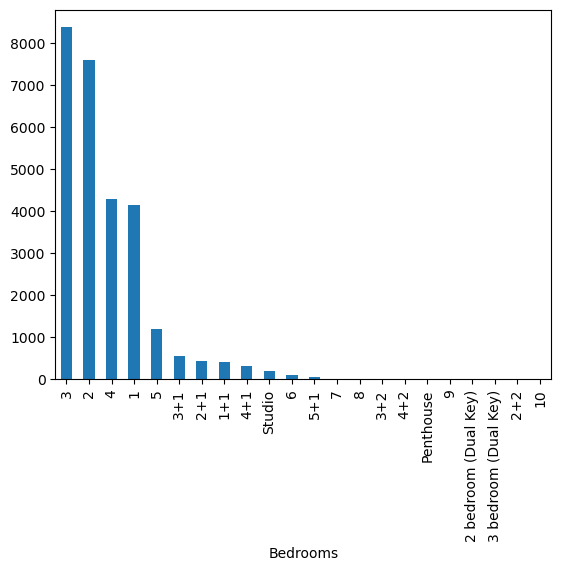

In [395]:
df["Bedrooms"].value_counts().plot(kind = "bar")

<Axes: xlabel='Bathrooms'>

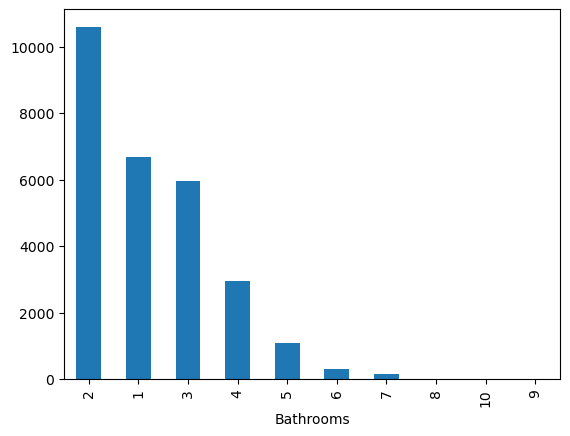

In [396]:
df["Bathrooms"].value_counts().plot(kind = "bar")

In [397]:
df["Bathrooms"] = df["Bathrooms"].fillna(2)
df["Bedrooms"] = df["Bedrooms"].fillna(3)

In [398]:
#reduce the tenure to the number of years
#fill all values with na.
df["Tenure"] = df["Tenure"].fillna("99 years")
df["Tenure"].str.lower().value_counts()

Tenure
leasehold/99 years           17384
freehold                     10222
999 years                      613
99 years                       174
110 years from 01/11/2017       54
leasehold/103 years             52
956 years from 27/05/1928       25
929 years from 01/01/1953       12
946 years from 01/01/1938        6
99 years from 18/06/2022         5
100 years from 01/02/1986        5
leasehold/60 years               5
99 years from 02/06/1970         3
946 years from 23/06/1938        3
n.a                              2
99 years from 15/06/2011         2
99 years from 14/08/2018         2
99 years from 01/10/2018         2
99 years from 01/05/1994         1
99 years from 14/10/2005         1
999 years from 23/03/1885        1
999 years from 25/01/1827        1
99 years from 03/08/2015         1
99 years from 18/05/2018         1
99 years from 05/10/2011         1
99 years from 17/03/1982         1
99 years from 01/09/1991         1
99 years from 31/10/2007         1
99 years from

In [399]:
def split_string(string):
    parts = re.split(r'\bfrom\b', string)
    return parts[0].lower()
df["Tenure"] = df["Tenure"].apply(lambda x:split_string(x))

In [400]:
df["Tenure"].value_counts()

Tenure
leasehold/99 years     17384
freehold               10222
999 years                613
99 years                 174
110 years                 54
leasehold/103 years       52
99 years                  33
956 years                 25
929 years                 12
946 years                  9
100 years                  5
leasehold/60 years         5
n.a                        2
999 years                  2
998 years                  1
Name: count, dtype: int64

In [401]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Age"] = df["Age"].astype(int)
df

,Address,Property Name,Property Type,Bedrooms,Bathrooms,Asking Price,Size,PSF,Age,Tenure,No. of Units,District,Amenities
0,2 Dunman Road (439188),Grand Dunman,Apartment,4+1,3,3764000,1679,"$2,242 psf",9,leasehold/99 years,1008,15,"{'Primary Schools': [{'Kong Hwa': '0.41 km'}, ..."
1,Shelford Road,Shelford View,Condominium,5,4,10000000,5134,"$1,948 psf",41,freehold,20,11,"{'Primary Schools': [{""Raffles Girls' Primary""..."
2,Hillview Rise,Hillhaven,Apartment,2,2,1387352,678,"$2,046 psf",9,leasehold/99 years,341,23,{'Primary Schools': [{'Chij Our Lady Queen Of ...
3,60H Kent Ridge Hill Residences (117321),Kent Ridge Hill Residences,Apartment,1,1,1030000,474,"$2,173 psf",1,leasehold/99 years,548,5,"{'Primary Schools': [], 'Secondary Schools': [..."
4,Marina Way,Marina One Residences,Apartment,1,1,1630000,700,"$2,329 psf",7,leasehold/99 years,1042,1,{'Primary Schools': [{'Cantonment Primary': '1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28808,Meyer Mansion,Meyer Mansion,Apartment,3,2,3580000,1109,"$3,228 psf",9,freehold,200,15,{'Primary Schools': [{'Tanjong Katong Primary'...
28809,Jalan Tembusu,Tembusu Grand,Condominium,2+1,2,2102000,883,"$2,381 psf",9,leasehold/99 years,638,15,{'Primary Schools': [{'Tanjong Katong Primary'...
28810,The Oceanfront @ Sentosa Cove,The Oceanfront @ Sentosa Cove,Condominium,4,5,7980000,3300,"$2,418 psf",14,leasehold/99 years,264,4,"{'Primary Schools': [], 'Secondary Schools': [..."
28811,Thiam Siew Avenue,The Continuum,Apartment,3,3,3473000,1302,"$2,667 psf",9,freehold,816,15,"{'Primary Schools': [{'Kong Hwa': '0.7 km'}, {..."


In [402]:
df = df[df['PSF'].notna()]
df["PSF"] = df["PSF"].apply(lambda x:clean(x))
df

/var/folders/kt/wb8mxzqx2pg6x0mm4lqw9w5h0000gn/T/ipykernel_16929/1646352153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PSF"] = df["PSF"].apply(lambda x:clean(x))


,Address,Property Name,Property Type,Bedrooms,Bathrooms,Asking Price,Size,PSF,Age,Tenure,No. of Units,District,Amenities
0,2 Dunman Road (439188),Grand Dunman,Apartment,4+1,3,3764000,1679,2242,9,leasehold/99 years,1008,15,"{'Primary Schools': [{'Kong Hwa': '0.41 km'}, ..."
1,Shelford Road,Shelford View,Condominium,5,4,10000000,5134,1948,41,freehold,20,11,"{'Primary Schools': [{""Raffles Girls' Primary""..."
2,Hillview Rise,Hillhaven,Apartment,2,2,1387352,678,2046,9,leasehold/99 years,341,23,{'Primary Schools': [{'Chij Our Lady Queen Of ...
3,60H Kent Ridge Hill Residences (117321),Kent Ridge Hill Residences,Apartment,1,1,1030000,474,2173,1,leasehold/99 years,548,5,"{'Primary Schools': [], 'Secondary Schools': [..."
4,Marina Way,Marina One Residences,Apartment,1,1,1630000,700,2329,7,leasehold/99 years,1042,1,{'Primary Schools': [{'Cantonment Primary': '1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28808,Meyer Mansion,Meyer Mansion,Apartment,3,2,3580000,1109,3228,9,freehold,200,15,{'Primary Schools': [{'Tanjong Katong Primary'...
28809,Jalan Tembusu,Tembusu Grand,Condominium,2+1,2,2102000,883,2381,9,leasehold/99 years,638,15,{'Primary Schools': [{'Tanjong Katong Primary'...
28810,The Oceanfront @ Sentosa Cove,The Oceanfront @ Sentosa Cove,Condominium,4,5,7980000,3300,2418,14,leasehold/99 years,264,4,"{'Primary Schools': [], 'Secondary Schools': [..."
28811,Thiam Siew Avenue,The Continuum,Apartment,3,3,3473000,1302,2667,9,freehold,816,15,"{'Primary Schools': [{'Kong Hwa': '0.7 km'}, {..."


In [403]:
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:")
print(nan_counts_per_column)

NaN counts per column:
Address            0
Property Name      0
Property Type      0
Bedrooms           0
Bathrooms          0
Asking Price       0
Size               0
PSF                0
Age                0
Tenure             0
No. of Units     684
District           0
Amenities          0
dtype: int64


In [404]:
# Replace all the blank "No. of Units data" with the median data
df["No. of Units"] = df["No. of Units"].fillna(df["No. of Units"].median())
df["No. of Units"] = df["No. of Units"].astype(int)
df.head

/var/folders/kt/wb8mxzqx2pg6x0mm4lqw9w5h0000gn/T/ipykernel_16929/2846017463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No. of Units"] = df["No. of Units"].fillna(df["No. of Units"].median())
/var/folders/kt/wb8mxzqx2pg6x0mm4lqw9w5h0000gn/T/ipykernel_16929/2846017463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No. of Units"] = df["No. of Units"].astype(int)


<bound method NDFrame.head of                                        Address                  Property Name  \
0                       2 Dunman Road (439188)                   Grand Dunman   
1                                Shelford Road                  Shelford View   
2                                Hillview Rise                      Hillhaven   
3      60H Kent Ridge Hill Residences (117321)     Kent Ridge Hill Residences   
4                                   Marina Way          Marina One Residences   
...                                        ...                            ...   
28808                            Meyer Mansion                  Meyer Mansion   
28809                            Jalan Tembusu                  Tembusu Grand   
28810            The Oceanfront @ Sentosa Cove  The Oceanfront @ Sentosa Cove   
28811                        Thiam Siew Avenue                  The Continuum   
28812                               Parc Emily                     Parc Emily  

In [405]:
def evaluate_expression(exp):
    return eval(exp)

In [406]:
# Transforming all values in Bedrooms to int
print(df["Bedrooms"].unique())

['4+1' '5' '2' '1' '1+1' '3' '4' 3 '6' '2+1' '3+1' '4+2' 'Studio' '5+1'
 '8' '3+2' '7' 'Penthouse' '9' '2 bedroom (Dual Key)'
 '3 bedroom (Dual Key)' '2+2' '10']


# Transforming categorical variables

In [407]:
# Changing property types to ints
df["Property Type"].replace({"Apartment":0, "Condominium":1}, inplace=True)

/var/folders/kt/wb8mxzqx2pg6x0mm4lqw9w5h0000gn/T/ipykernel_16929/2531218543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Property Type"].replace({"Apartment":0, "Condominium":1}, inplace=True)


In [408]:
# Checking that all ammenity elements are dicts
def check_same_type(lst):
    if not lst:
        return False  # Empty list has no type
    first_type = type(lst[0])
    return all(type(item) == first_type for item in lst[1:])

amenities = df['Amenities'].tolist()

print(check_same_type(amenities))

True


In [409]:
# Convert each element in the Amenities column to a dict
import ast

def parse_str_to_dict(string_dict):
    parsed_dict = ast.literal_eval(string_dict)
    return parsed_dict

amenities = list(map(lambda element: parse_str_to_dict(element), df['Amenities'].tolist()))
print(type(amenities[0]))

<class 'dict'>


In [410]:
# Need to rerun all cells for this to work
df_normalized = pd.json_normalize(amenities)
df = pd.concat([df.drop('Amenities', axis=1), df_normalized], axis=1)

In [414]:
# How many Primary schools how many sec schools?
df['Primary Schools'] = df['Primary Schools'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['Secondary Schools'] = df['Secondary Schools'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['Shopping Malls'] = df['Shopping Malls'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['Groceries & Supermarts'] = df['Groceries & Supermarts'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [418]:
df.head

<bound method NDFrame.head of                                        Address               Property Name  \
0                       2 Dunman Road (439188)                Grand Dunman   
1                                Shelford Road               Shelford View   
2                                Hillview Rise                   Hillhaven   
3      60H Kent Ridge Hill Residences (117321)  Kent Ridge Hill Residences   
4                                   Marina Way       Marina One Residences   
...                                        ...                         ...   
25805                                      NaN                         NaN   
25815                                      NaN                         NaN   
25825                                      NaN                         NaN   
25830                                      NaN                         NaN   
25844                                      NaN                         NaN   

       Property Type Bedrooms Bat